In [4]:
#1 Testing the development environment (Python 3 + OpenCV3)

import sys
import cv2
import numpy as np

#checking version of python
print('Python - ',sys.version_info[:])

#checking version of opencv3
print('OpenCV - ',cv2.__version__)

#checking version of numpy
print('Numpy - ',np.__version__)



Python -  (3, 6, 1, 'final', 0)
OpenCV -  3.2.0-dev
Numpy -  1.12.1


<IPython.core.display.Javascript object>


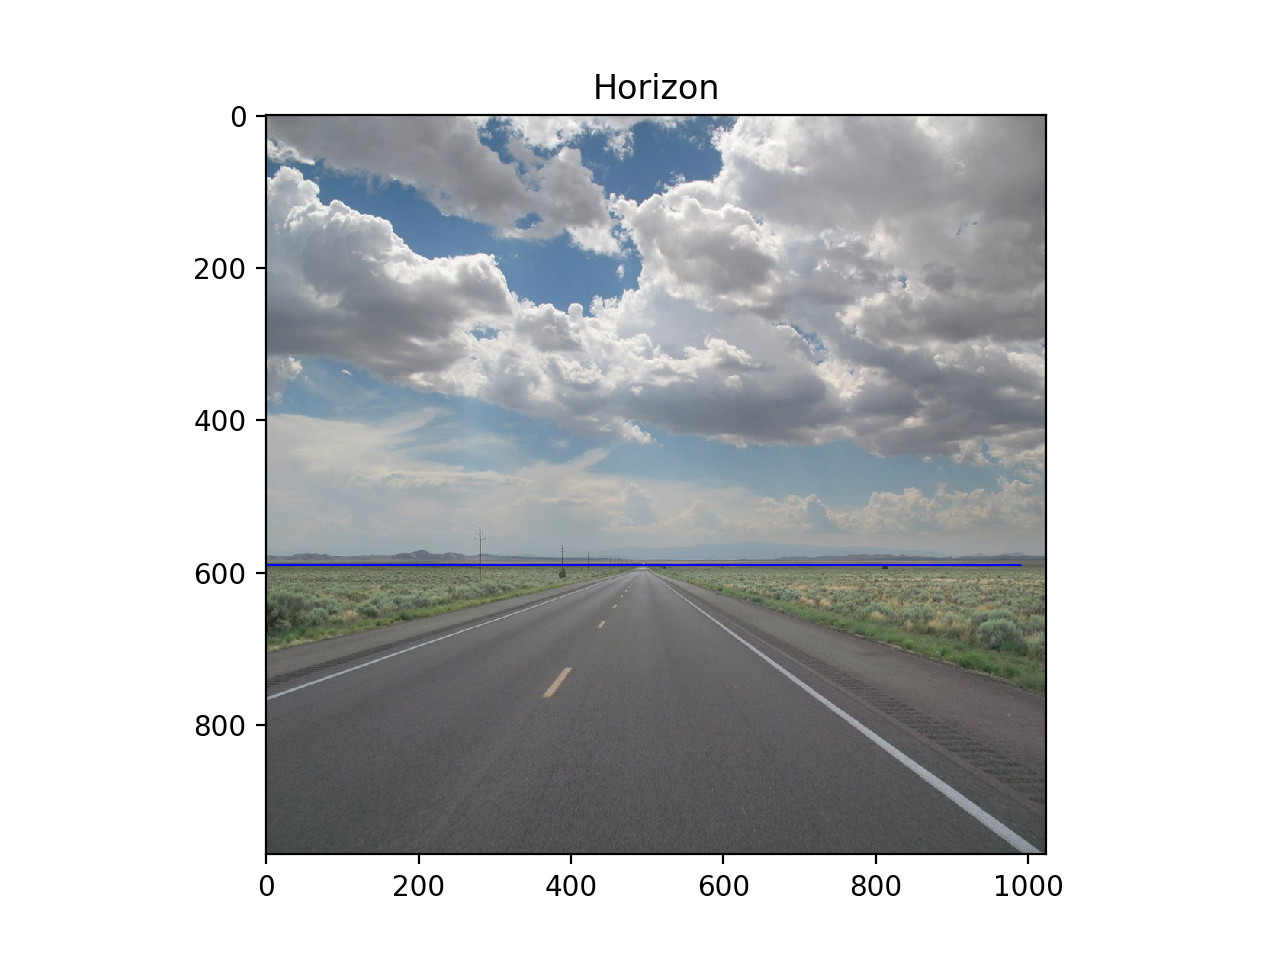

In [90]:
#2 Applying hough transform, to detect the horizon

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook


image = mpimg.imread('files/houghLines.jpg')
gray  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 50,400)

lines = cv2.HoughLines( edges, 1 , np.pi / 180, 200)


for rho, theta in lines[7]:
    x  = np.cos(theta)
    y  = np.sin(theta)
    x0 = x * rho
    y0 = y * rho
    x1 = int(x0 + 1000 * (-y))
    y1 = int(y0 + 1000 * (x))
    x2 = int(x0 - 1000 * (-y))
    y2 = int(y0 - 1000 * (x))
    
    #we now obtained the end points of the lines, lets plot them
    
    cv2.line(image, (x1, y2), (x2, y2), (0,0,255), 2)


plt.imshow(image)
plt.title('Horizon')
plt.show()

<IPython.core.display.Javascript object>


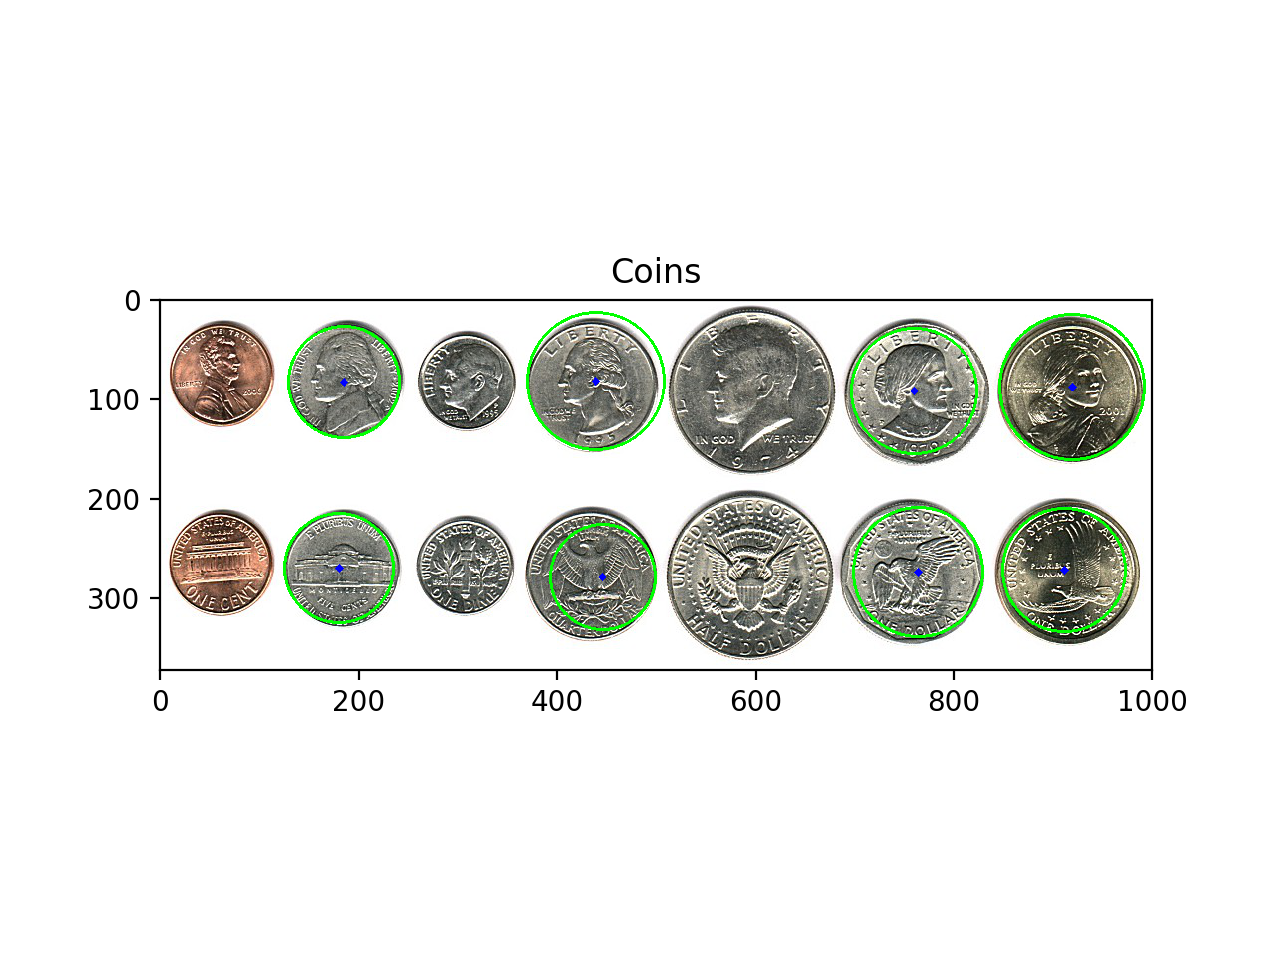

In [89]:
#3 Applying hough transform, to circles in an image




image = mpimg.imread('files/houghCircles.jpg')

gray  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur  = cv2.Canny(gray, 600,800)


circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2 = 30, minRadius=50, maxRadius=80)


for i in circles[0,:]:
    #draw the outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0,255,0), 2)
    
    #draw the center of the circle
    cv2.circle(image, (i[0],i[1]), 2, (0,0,255), 3)
    
plt.imshow(image)
plt.title('Coins')
plt.show()

In [93]:
#4 Stretch and Shrink an Image

image = mpimg.imread('files/lena.jpg')

scaleup = cv2.resize(image, None, fx=2, fy=2,interpolation=cv2.INTER_CUBIC)

fig = plt.figure()

fig.subplot(121)
fig.imshow
